# California Housing Analysis

## Imports

In [131]:
# for data structures
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

import scipy

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

## Loading data

In [2]:
data = pd.read_csv("../data/housing.csv")

In [3]:
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3071,-119.25,35.78,35.0,1927.0,386.0,1371.0,414.0,2.2981,69900.0,INLAND
20540,-121.72,38.54,16.0,2790.0,624.0,1386.0,636.0,3.1908,194300.0,INLAND
1950,-120.83,38.74,17.0,3685.0,775.0,1714.0,734.0,2.2269,128300.0,INLAND
2686,-115.53,32.97,35.0,1583.0,340.0,933.0,318.0,2.4063,70700.0,INLAND
4876,-118.28,34.03,25.0,1407.0,550.0,1193.0,472.0,1.2989,225000.0,<1H OCEAN
7820,-118.11,33.91,36.0,1088.0,231.0,617.0,211.0,3.8824,193100.0,<1H OCEAN
8953,-118.38,34.02,45.0,2098.0,486.0,1343.0,481.0,3.9615,268600.0,<1H OCEAN
20373,-118.85,34.17,42.0,564.0,96.0,220.0,81.0,4.5625,318800.0,<1H OCEAN
12636,-121.49,38.47,26.0,6121.0,1185.0,4224.0,1105.0,2.3496,68000.0,INLAND
1015,-121.77,37.67,20.0,8068.0,1217.0,3489.0,1259.0,5.7907,264200.0,INLAND


In [4]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,20640,NaN,NaN,NaN,-119.57,2.00353,-124.35,-121.8,-118.49,-118.01,-114.31
latitude,20640,NaN,NaN,NaN,35.6319,2.13595,32.54,33.93,34.26,37.71,41.95
housing_median_age,20640,NaN,NaN,NaN,28.6395,12.5856,1,18,29,37,52
total_rooms,20640,NaN,NaN,NaN,2635.76,2181.62,2,1447.75,2127,3148,39320
total_bedrooms,20433,NaN,NaN,NaN,537.871,421.385,1,296,435,647,6445
population,20640,NaN,NaN,NaN,1425.48,1132.46,3,787,1166,1725,35682
households,20640,NaN,NaN,NaN,499.54,382.33,1,280,409,605,6082
median_income,20640,NaN,NaN,NaN,3.87067,1.89982,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640,NaN,NaN,NaN,206856,115396,14999,119600,179700,264725,500001
ocean_proximity,20640,5,<1H OCEAN,9136,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Nullity Analysis

In [6]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

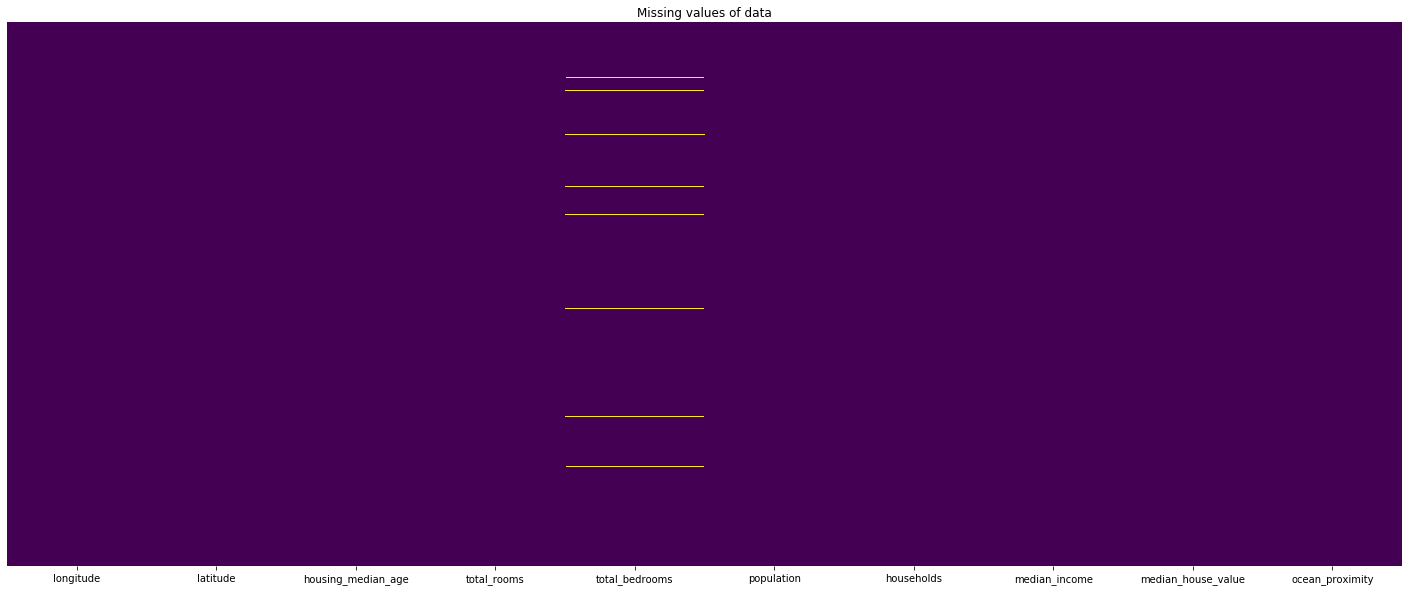

In [8]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False);
plt.title("Missing values of data");

Some statistics for filling missing values are:
- average (537)
- median
- first quartile

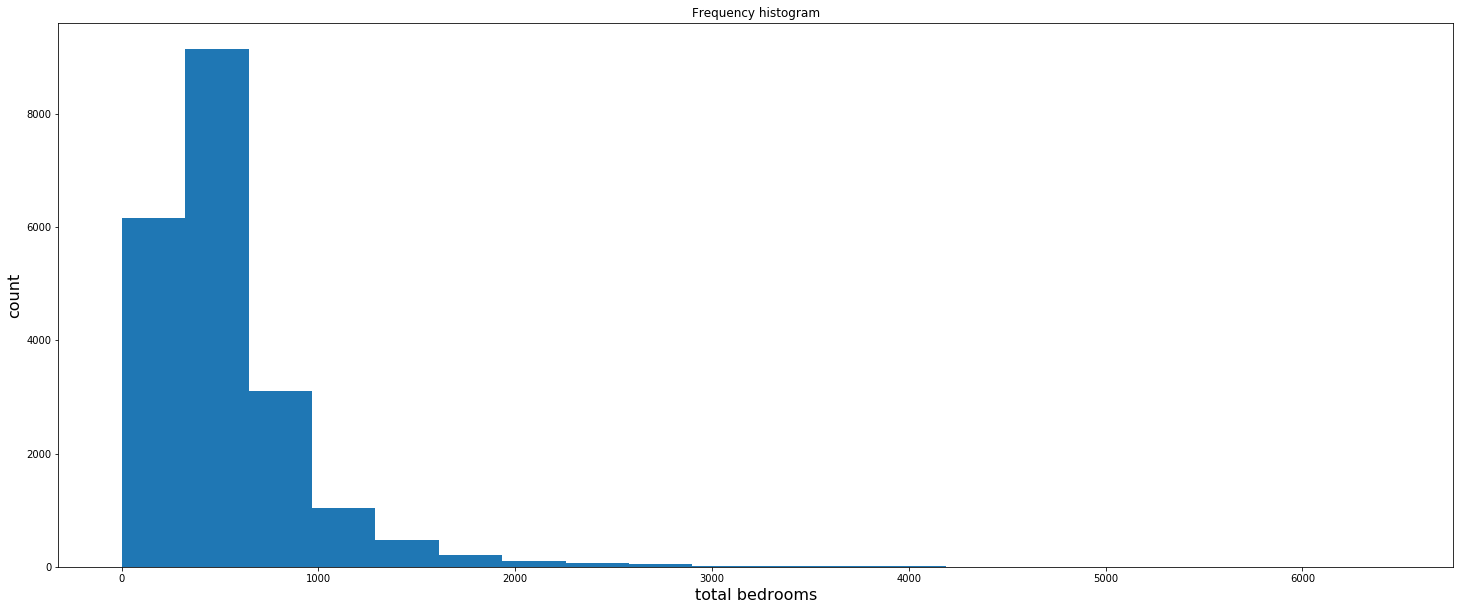

In [9]:
plt.hist(data[data['total_bedrooms'].notna()]['total_bedrooms'], bins=20);
plt.title("Frequency histogram");
plt.xlabel("total bedrooms");
plt.ylabel("count");

This data has too many outliers and so filling it with the mean will affect our prediction

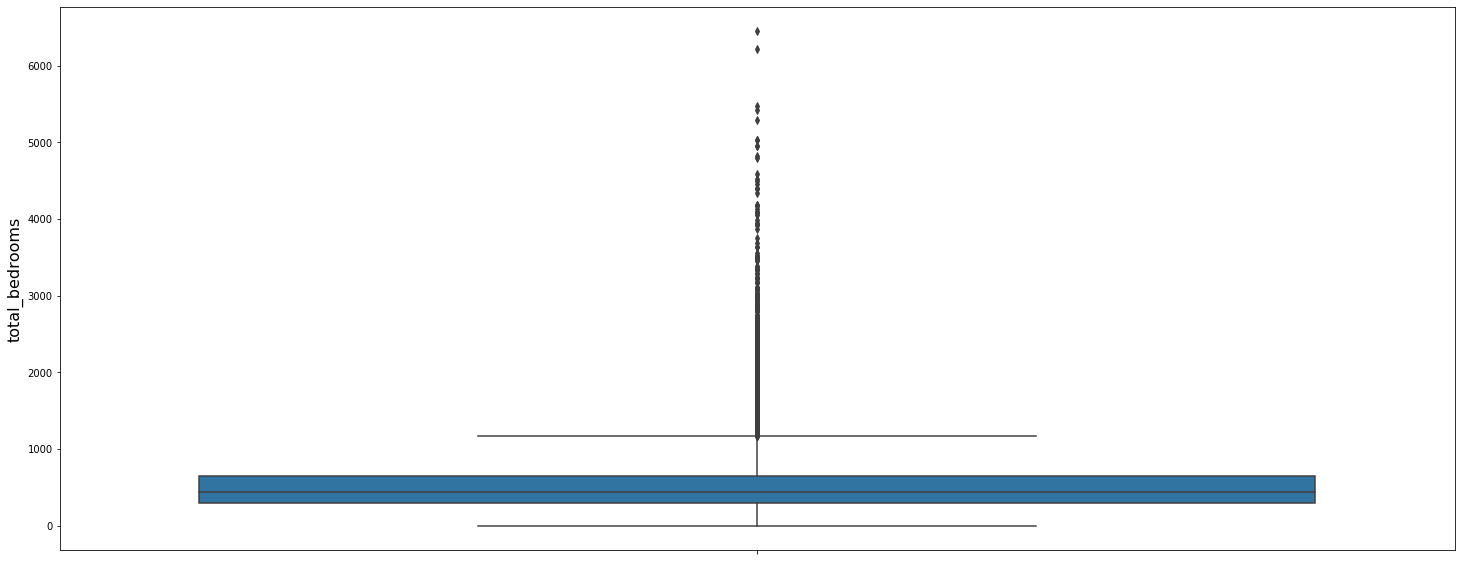

In [10]:
sns.boxplot(y="total_bedrooms", data=data);

Since there are a lot of outliers, let us use the median to fill the missing values. We can fill the values according the categorical column `ocean_proximity`

In [11]:
def calc_categorical_median(dta):
    """
    Fill in the missing values of total_bedrooms based on value of ocean_proximity
    """
    prox_values = dta['ocean_proximity'].unique()
    for prox in prox_values:
        median = dta[dta['ocean_proximity'] == prox]['total_bedrooms'].median()
        
        dta.loc[dta['ocean_proximity'] == prox, "total_bedrooms"] = \
        dta[dta['ocean_proximity'] == prox]["total_bedrooms"].fillna(median)


In [12]:
calc_categorical_median(data)

In [13]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Exploratory Data Analysis

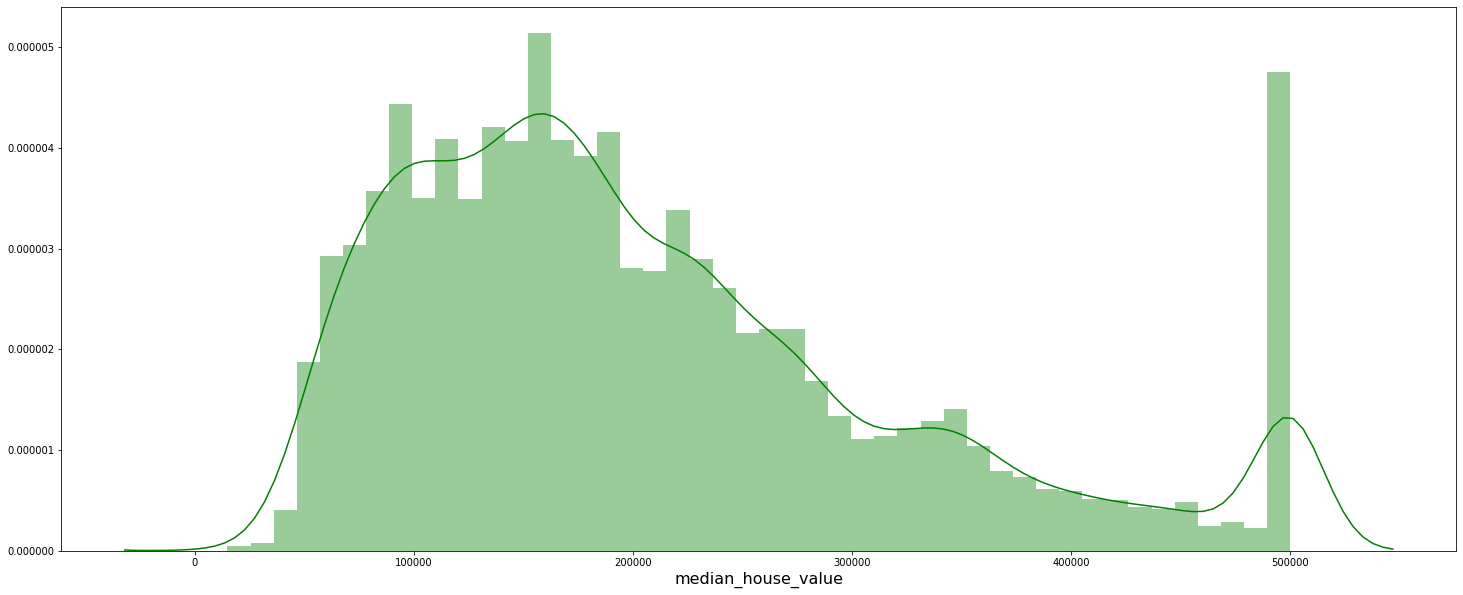

In [14]:
sns.distplot(data['median_house_value'], color="green");

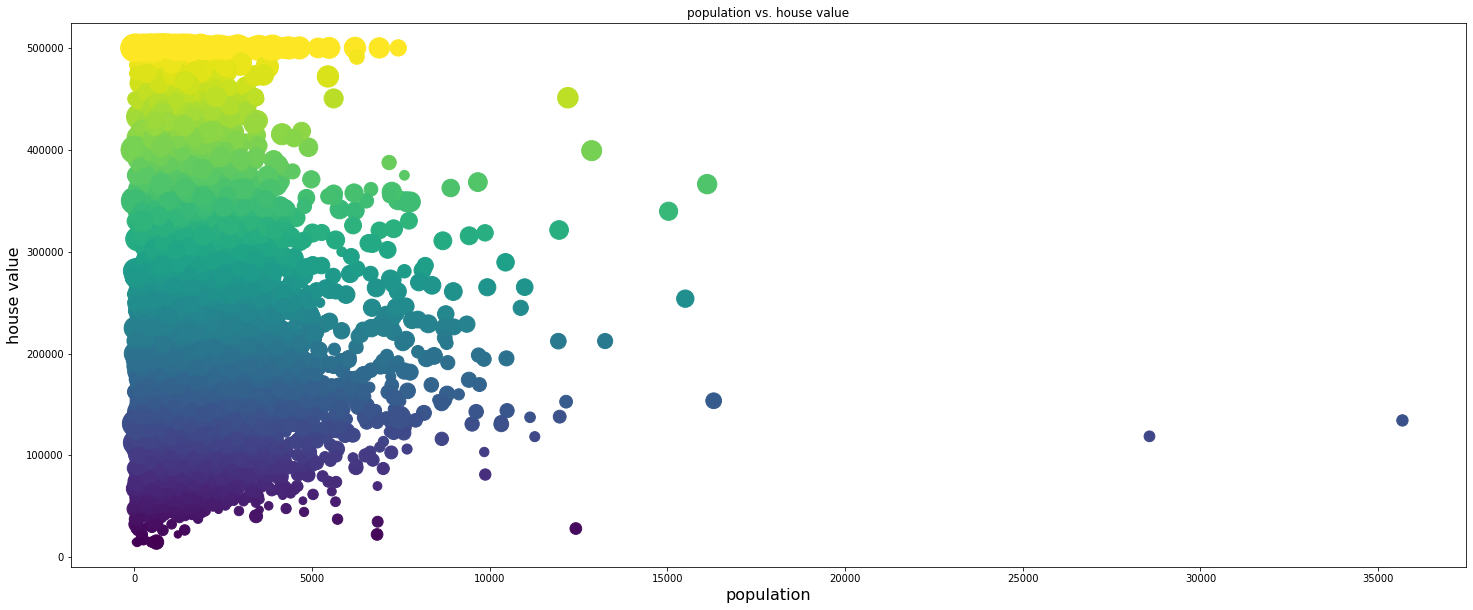

In [15]:
plt.scatter(x=data['population'], 
                y=data['median_house_value'], 
                c=data['median_house_value'], 
                s=data['median_income']*50);
plt.title("population vs. house value");
plt.xlabel("population");
plt.ylabel("house value");

### Removing Outliers

In [16]:
data = data.loc[data["median_house_value"] <= 500000, :]

In [17]:
data = data.loc[data["population"] < 25000, :]

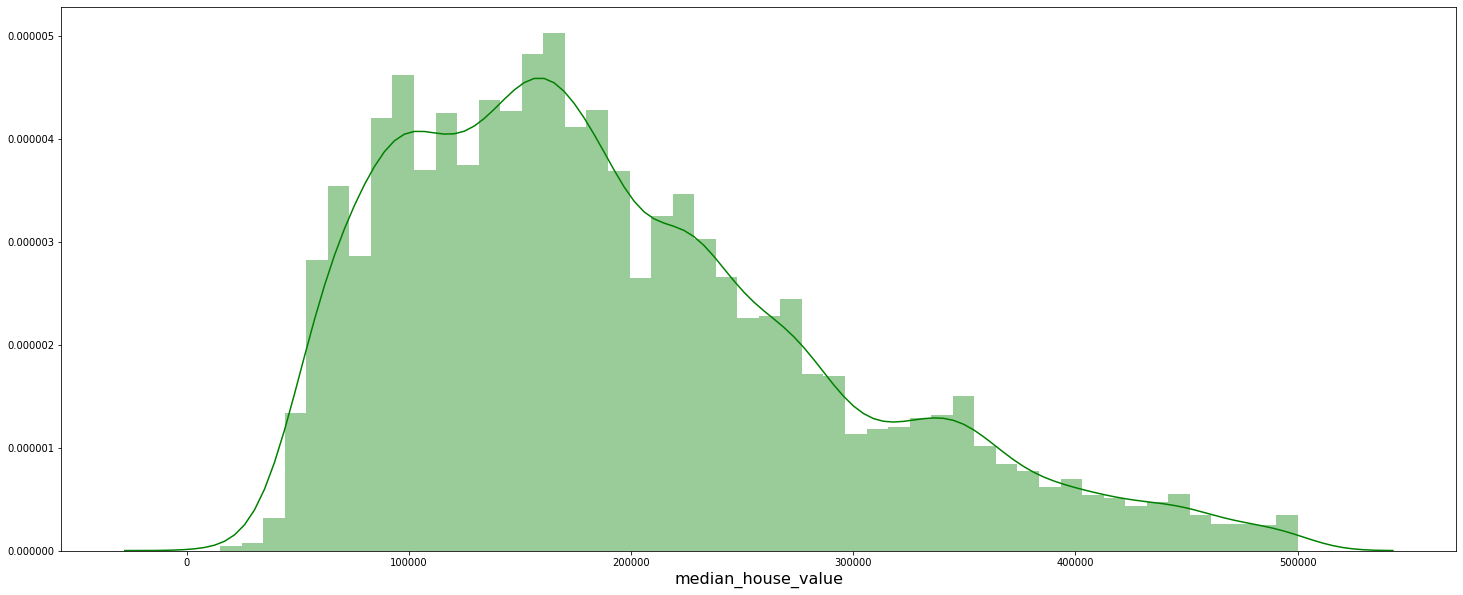

In [18]:
sns.distplot(data['median_house_value'], color="green");

We have removed the outliers of house values and population from our data. We can now effectively use them as features to predict the house prices.

### Scatterplot on coordinates

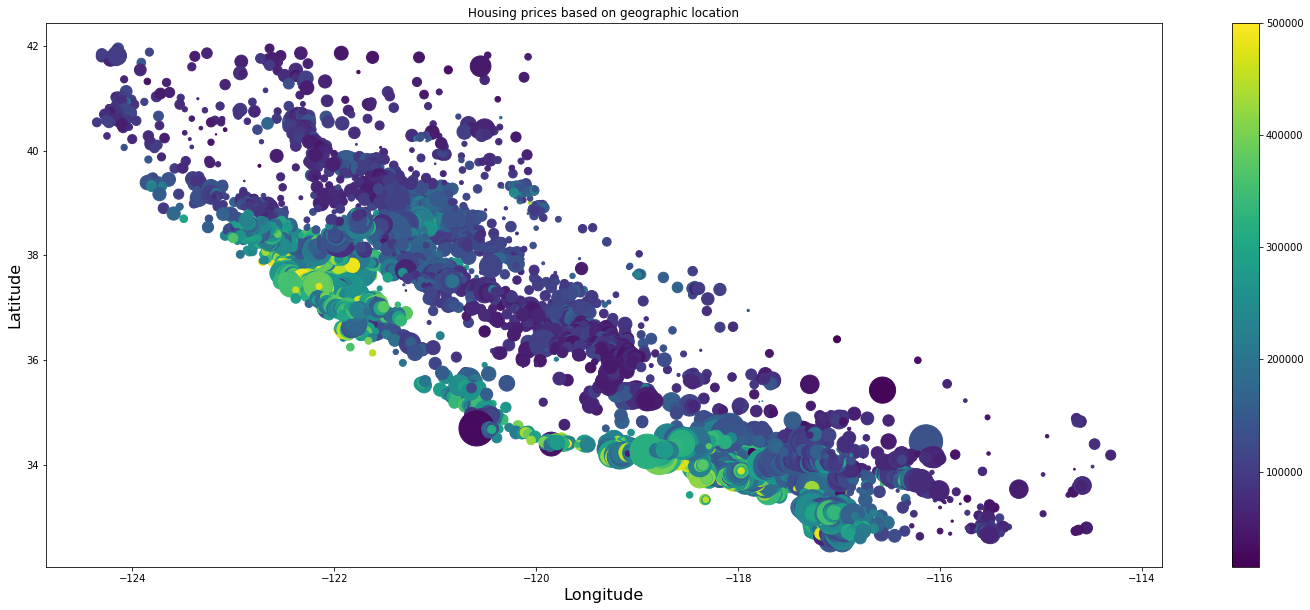

In [19]:
plt.scatter(x=data['longitude'], 
            y=data["latitude"], 
            c=data["median_house_value"], 
            s=data["population"]/10);
plt.colorbar();
plt.xlabel("Longitude");
plt.ylabel("Latitude");
plt.title("Housing prices based on geographic location");

### Correlation matrix

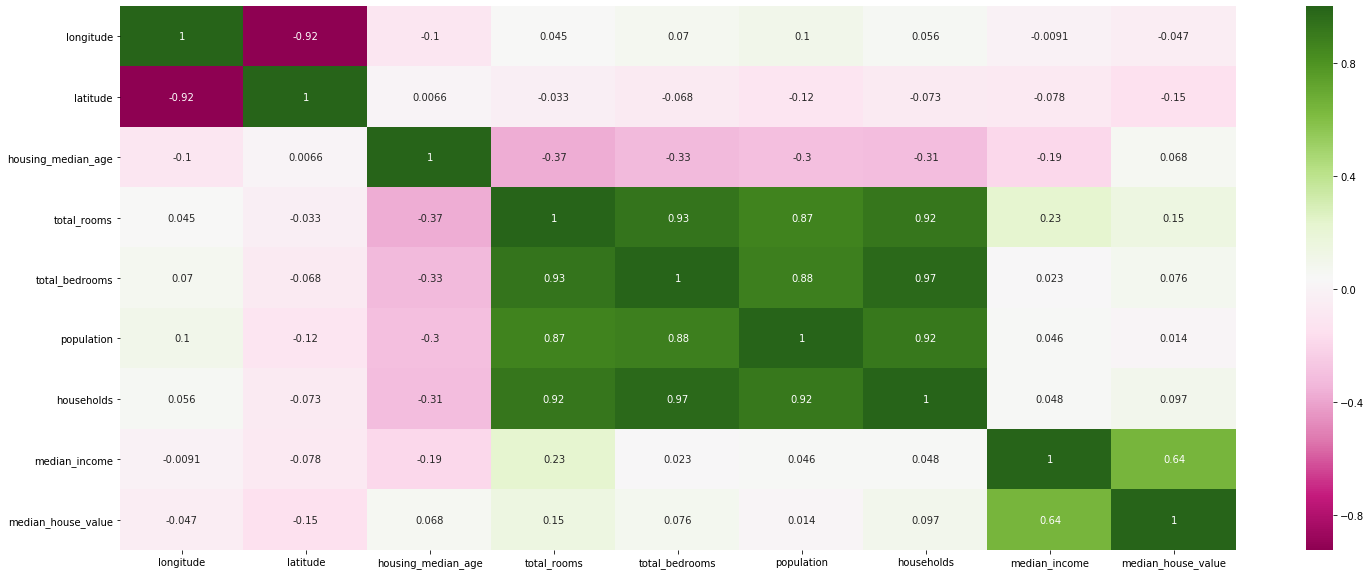

In [20]:
sns.heatmap(data.corr(), cmap="PiYG", annot=True);

We see that `total_bedrooms`, `total_rooms`, `households`, and `population` are all very highly correlated to one another.

### Looking into ocean proximity

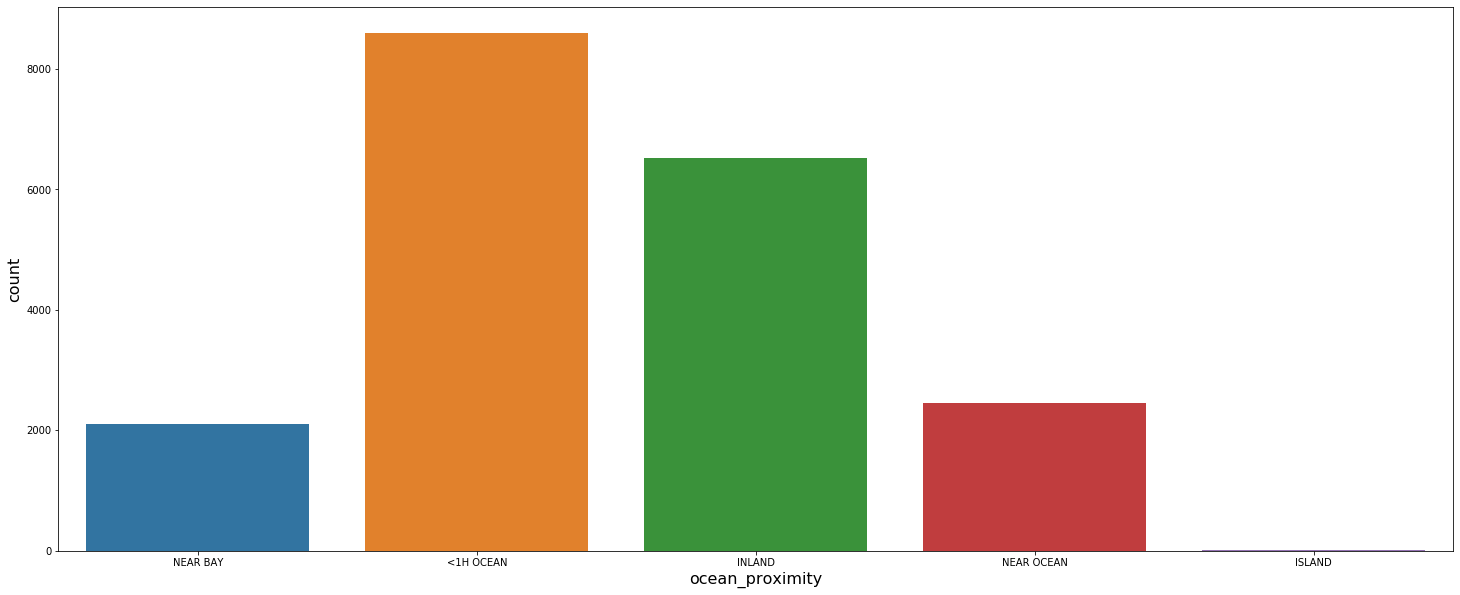

In [21]:
sns.countplot(data=data, x="ocean_proximity");

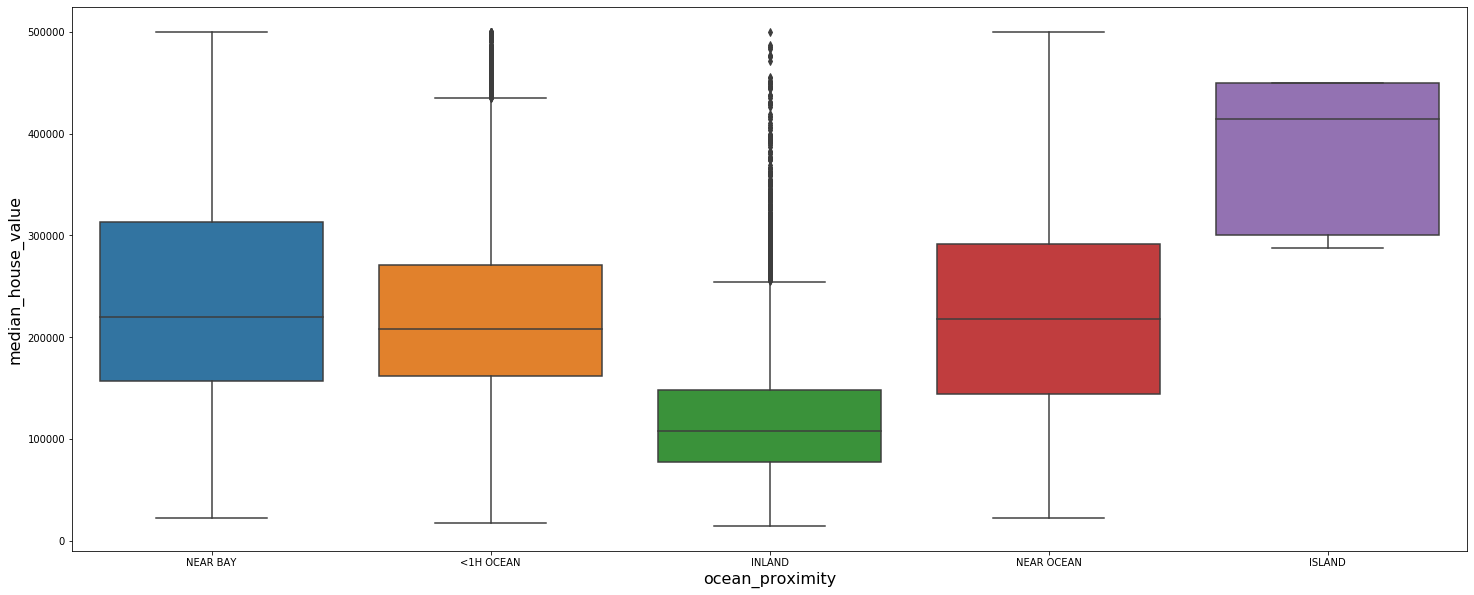

In [22]:
# Boxplot of housing values based on geographic location wrt ocean
sns.boxplot(data=data, x="ocean_proximity", y="median_house_value");

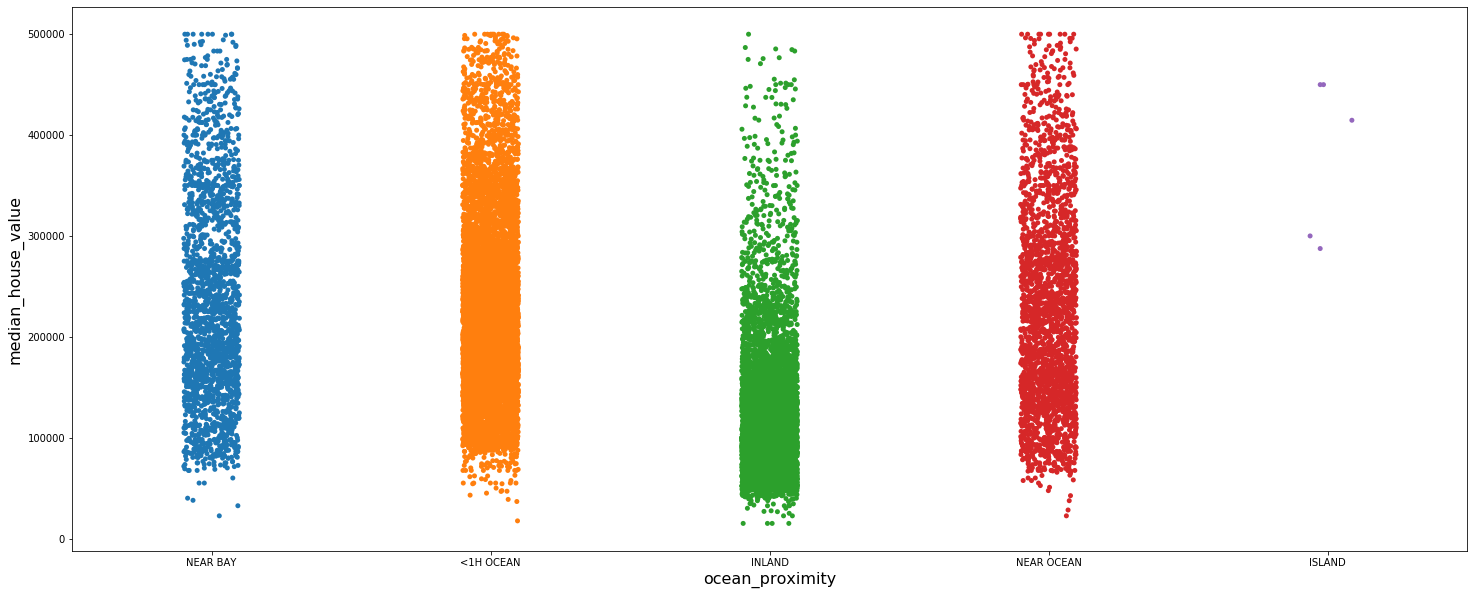

In [23]:
sns.stripplot(data=data, x="ocean_proximity", y="median_house_value");

## Preprocessing

### Feature selection

In [24]:
# ocean_proximity -> dummy variables
data = pd.concat([pd.get_dummies(data['ocean_proximity'], drop_first=True), data], axis=1)

In [25]:
data.drop("ocean_proximity", axis=1, inplace=True)

In [26]:
data["income_per_pop"] = data["median_income"] / data["population"]
data["br_per_house"] = data["total_bedrooms"] / data["households"]
data["house_per_population"] = data["households"] / data["population"]

In [27]:
data = data[["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", 
             "population", "households", "median_income", "INLAND", "ISLAND", "NEAR BAY", 
             "NEAR OCEAN", "income_per_pop", "house_per_population", "br_per_house", "median_house_value"]]

In [28]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_per_pop,house_per_population,br_per_house,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0,0.025855,0.391304,1.023810,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0,0.003457,0.473969,0.971880,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0,0.014632,0.356855,1.073446,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0,0.010113,0.392473,1.073059,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0,0.006807,0.458407,1.081081,342200.0


### Train-test split

In [113]:
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

In [114]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Standardizing the data

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_standard_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns.values.tolist())

X_train, X_test, y_train, y_test = train_test_split(X_standard_scaled, y, random_state=42)

### Principal Component Analysis (PCA)

In [36]:
total=0
clist=[]
for i in np.arange(0,X_train.shape[1]):
    pca=PCA(n_components=i+1)
    pca.fit(X_train)
    total=total+pca.explained_variance_ratio_[i]
    clist.append(total)

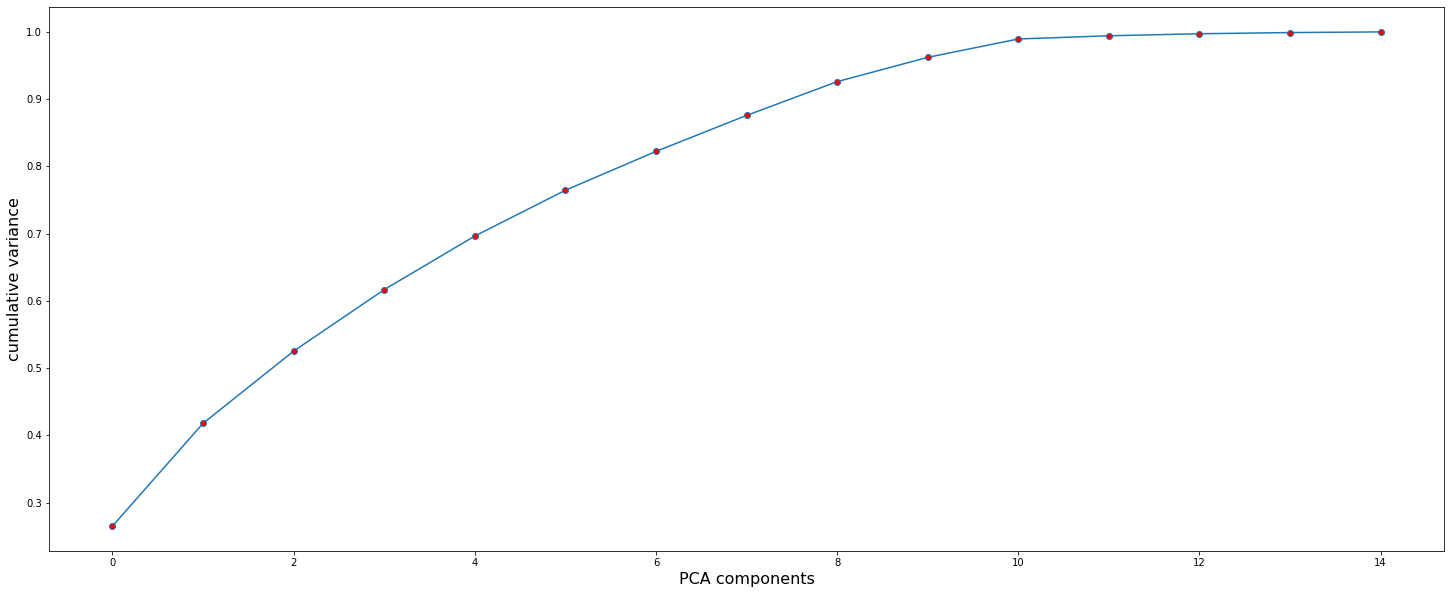

In [37]:
plt.plot(np.arange(0,X_train.shape[1]), clist, marker='o', markerfacecolor='r');
plt.xlabel('PCA components');
plt.ylabel('cumulative variance');

Here we see that 10 principal components gives us almost 100% of the variance

## Regression Models

### Linear Regression

#### Linear regression with most correlated feature

In [132]:
lr = LinearRegression()
lr.fit(X_train.loc[:, ["median_income"]], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
predictions = lr.predict(X_test.loc[:, ["median_income"]])
mean_squared_error(y_test, predictions)

5720501924.769297

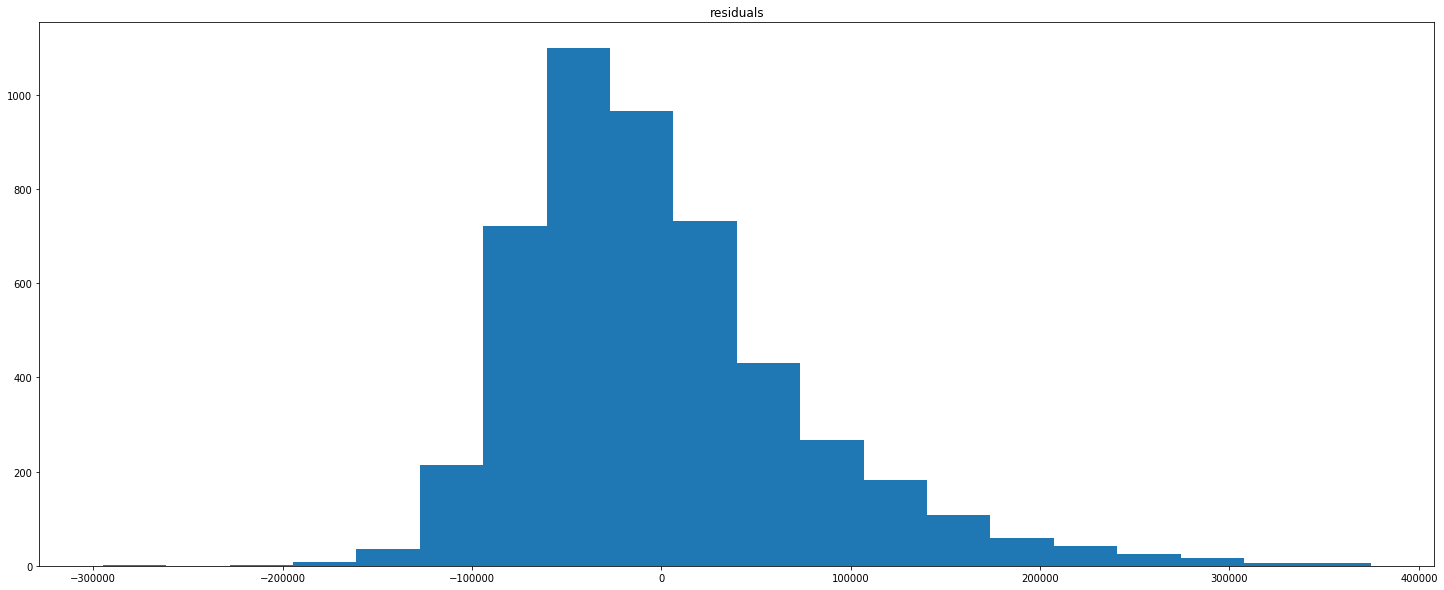

In [134]:
plt.hist(y_test-predictions, bins=20);
plt.title("residuals");

#### Linear Regression with all features

In [135]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
predictions = lr.predict(X_test)
mean_squared_error(y_test, predictions)

3481045300.880199

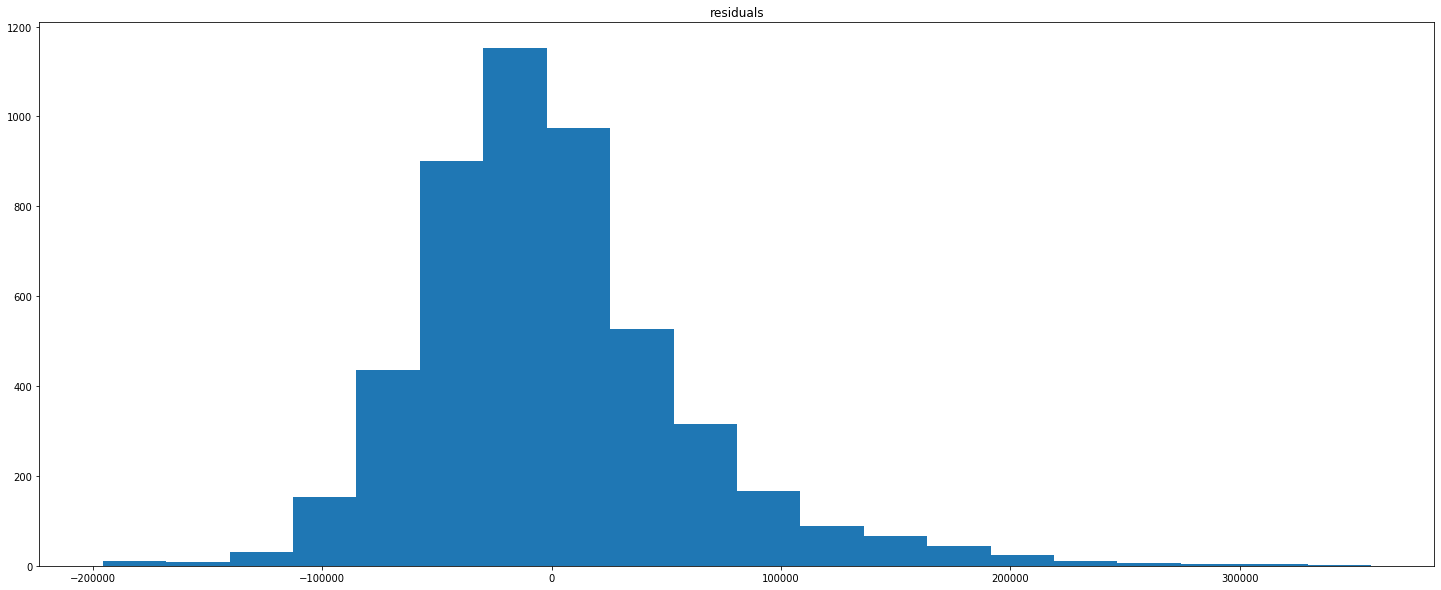

In [137]:
plt.hist(y_test-predictions, bins=20);
plt.title("residuals");

#### Polynomial regression with most correlated feature

In [138]:
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train.loc[:, ["median_income"]])
X_test_poly=poly.fit_transform(X_test.loc[:, ["median_income"]])


In [139]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
predictions = lr.predict(X_test_poly)
mean_squared_error(y_test, predictions)

5712868697.341241

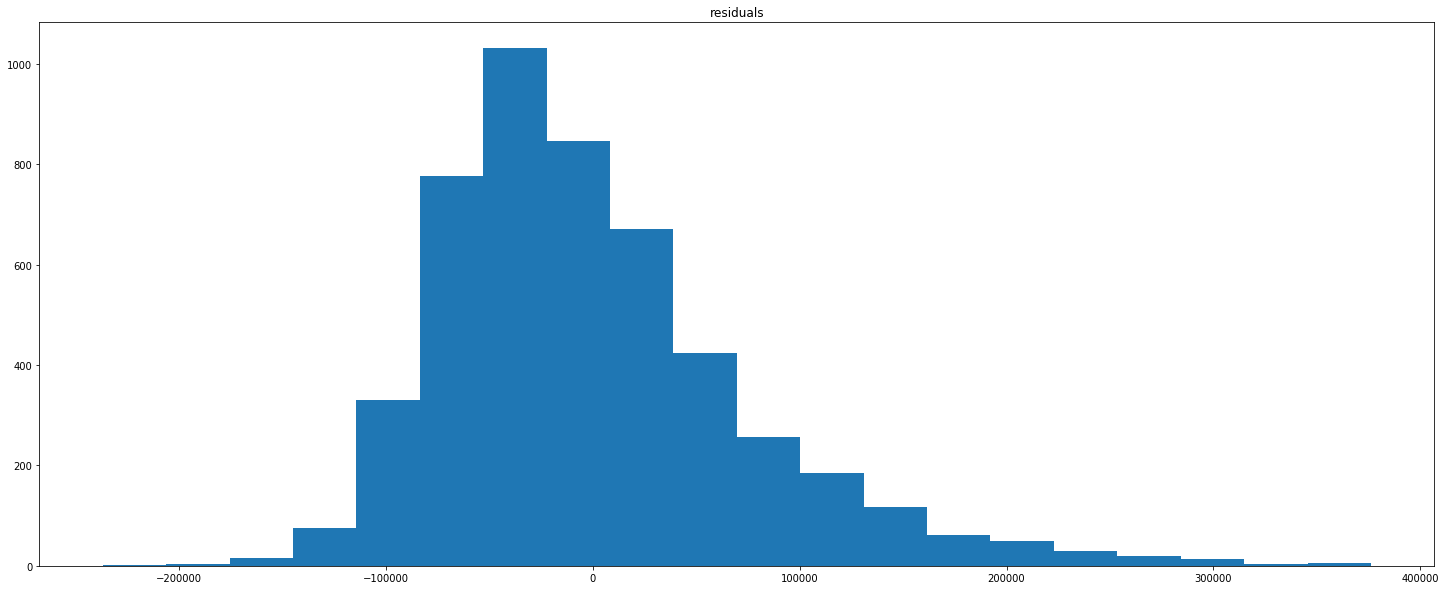

In [141]:
plt.hist(y_test - predictions, bins=20);
plt.title("residuals");

#### Polynomial regression with all features

In [142]:
poly=PolynomialFeatures(degree=3)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)

In [143]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
predictions = lr.predict(X_test_poly)
mean_squared_error(y_test, predictions)

3378185158.8185997

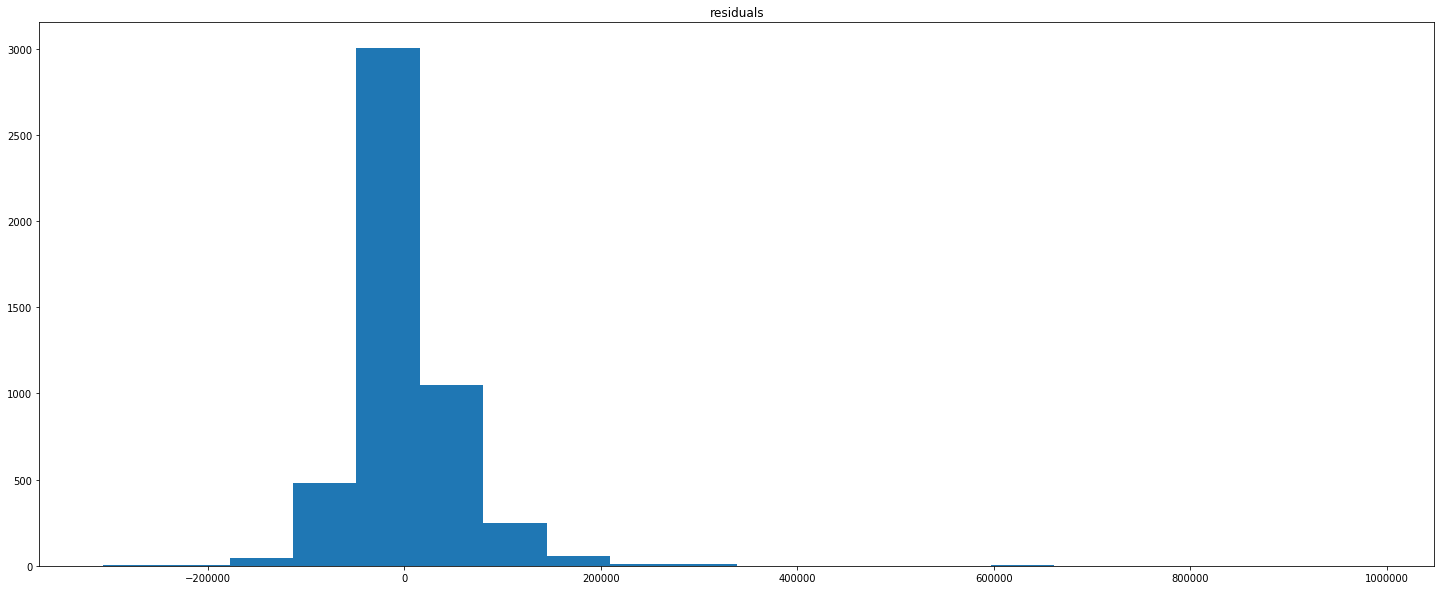

In [145]:
plt.hist(y_test - predictions, bins=20);
plt.title("residuals");

### KNeighbors

In [126]:
kn = KNeighborsRegressor()
kn.fit(X_train, y_train)
kn.score(X_test, y_test)

0.6950950086413132

### Random Forest

In [127]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7536076338338887

In [128]:
feature_importances = pd.DataFrame(rf.feature_importances_ ,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
median_income,0.431357
INLAND,0.152600
house_per_population,0.115656
longitude,0.077344
latitude,0.075292
housing_median_age,0.043789
br_per_house,0.030319
total_rooms,0.017768
total_bedrooms,0.013655
income_per_pop,0.013451


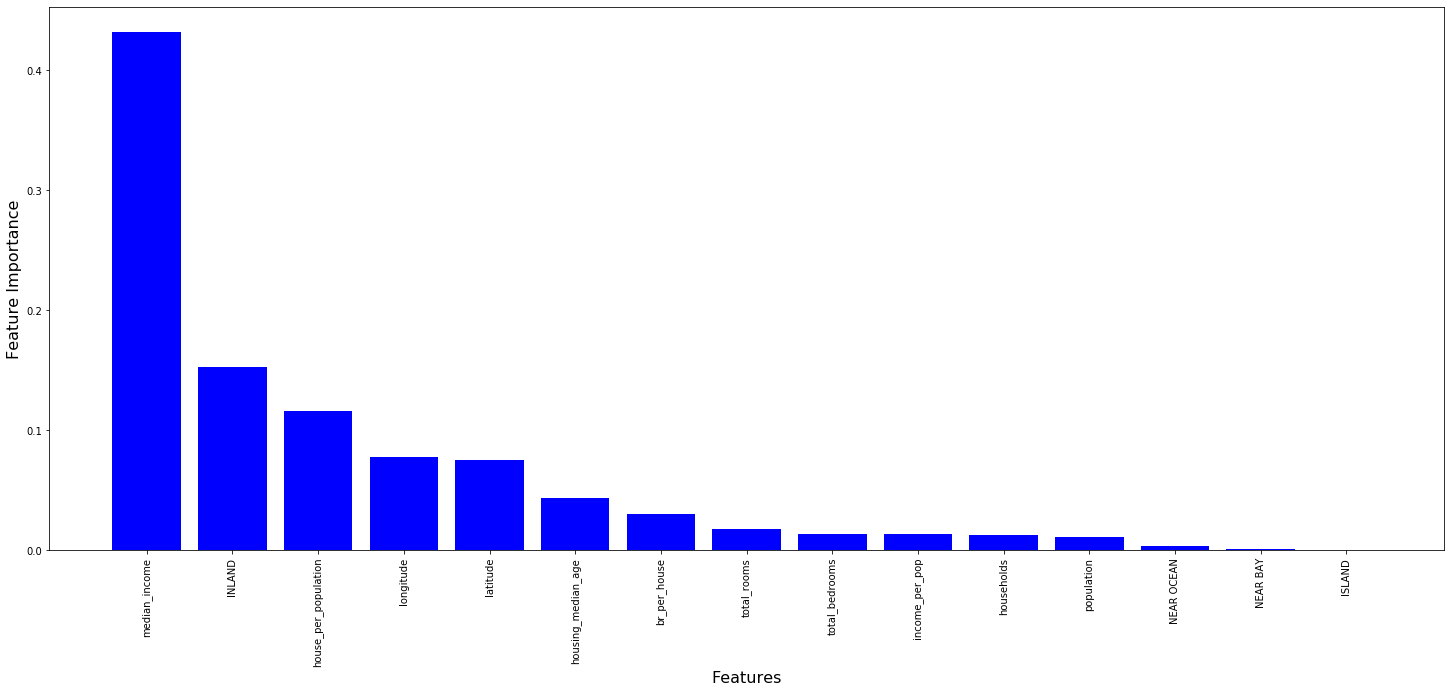

In [129]:
plt.bar(feature_importances.index, feature_importances.importance, color = "blue");
plt.xlabel("Features");
plt.xticks(rotation=90);
plt.ylabel("Feature Importance");

We're only able to attain an accuracy of about $76\%$. Let us try to manipulate the data to get a better accuracy. 

We saw above that 10 principal components gives us almost all the data. Let us work with this and see if it enhances the performance of our model.

In [98]:
pca = PCA(n_components=10)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 
                                      'principal component 2', 
                                      'principal component 3', 
                                      'principal component 4', 
                                      'principal component 5', 
                                      'principal component 6', 
                                      'principal component 7', 
                                      'principal component 8', 
                                      'principal component 9', 
                                      'principal component 10'
                                     ])
finalDf = pd.concat([principalDf, data[['median_house_value']]], axis = 1)

In [99]:
finalDf.dropna(inplace=True)
X, y = finalDf.drop('median_house_value', axis=1), finalDf['median_house_value']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Linear Regression w/ PCA

In [101]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.034035564278243835

### KNeighbors w/PCA

In [102]:
kn = KNeighborsRegressor()
kn.fit(X_train, y_train)
kn.score(X_test, y_test)

-0.20170058767830423

### Random Forest

In [103]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.17914638401579885

In [130]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.5578092777230075